In [1]:
import pandas as pd

In [2]:
ccd = pd.read_csv(r"C:\Users\reddy\Downloads\complaints.csv (1)\complaints.csv")

C:\Users\reddy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
ccd.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",PA,15146.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5523011
1,2022-05-01,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PA,15146.0,NaN,NaN,Web,2022-05-01,In progress,Yes,NaN,5523012
2,2022-04-15,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,UNITED SERVICES AUTOMOBILE ASSOCIATION,FL,32812.0,NaN,NaN,Referral,2022-04-18,In progress,Yes,NaN,5462556
3,2022-05-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33713.0,NaN,NaN,Web,2022-05-02,In progress,Yes,NaN,5529881
4,2022-03-16,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NJ,8081.0,NaN,Consent not provided,Web,2022-03-16,Closed with explanation,Yes,NaN,5330688


In [30]:
ccd.dtypes

Product                         object
Consumer_complaint_narrative    object
category_id                      int64
dtype: object

In [4]:
ccd.shape

(2653059, 18)

In [5]:
col = ['Product', 'Consumer complaint narrative']
ccd= ccd[col]
ccd= ccd[pd.notnull(ccd['Consumer complaint narrative'])]

In [6]:
ccd.columns=['Product', 'Consumer_complaint_narrative']

In [7]:
ccd['category_id'] = ccd['Product'].factorize()[0]

In [8]:
cat_id = ccd[["Product", "category_id"]].drop_duplicates().sort_values('category_id')

In [9]:
cat_id_d = dict(cat_id.values)

In [10]:
id_cat = dict(cat_id[['category_id','Product']].values)

In [11]:
ccd.head()

,Product,Consumer_complaint_narrative,category_id
9,"Credit reporting, credit repair services, or o...",I previously sent my written request to Experi...,0
14,Credit card or prepaid card,It should be illegal. I havent use my credit c...,1
15,"Credit reporting, credit repair services, or o...",I have been a Kohls credit card holder for ove...,0
28,"Credit reporting, credit repair services, or o...",My credit reports are inaccurate. These inaccu...,0
32,Checking or savings account,Banking services or operating as expected. Sun...,2


In [12]:
import matplotlib.pyplot as plt

In [13]:
fig1 = plt.figure(figsize= (8,6))

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='Product'>

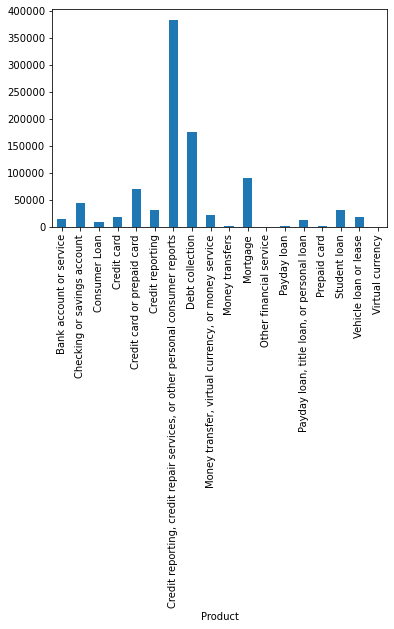

In [14]:
ccd.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(sublinear_tf= True, min_df = 5, norm= 'l2', ngram_range= (1,1), stop_words ='english')

In [17]:
ftres = tfidf.fit_transform(ccd['Consumer_complaint_narrative'])

In [18]:
labels = ccd.category_id
ftres.shape

(926071, 43291)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(ccd['Consumer_complaint_narrative'], ccd['Product'], random_state= 0)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vector_count = CountVectorizer()

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer

In [24]:
X_train_count = vector_count.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

In [25]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [26]:
print(clf.predict(vector_count.transform(['I have outdated information on my credit repor'])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [27]:
y_pred = clf.predict(vector_count.transform(X_test))

In [28]:
from sklearn import metrics

In [29]:
print(metrics.classification_report(y_test,y_pred, labels= ccd.Product, target_names=ccd['Product'].unique()))

C:\Users\reddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1986: UserWarning: labels size, 926071, does not match size of target_names, 18
  warnings.warn(


                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.84      0.86      0.85     96063
                                                 Credit card or prepaid card       0.60      0.79      0.68     17627
                                                 Checking or savings account       0.84      0.86      0.85     96063
                                                             Debt collection       0.84      0.86      0.85     96063
                                                       Vehicle loan or lease       0.65      0.79      0.71     11066
                          Money transfer, virtual currency, or money service       0.84      0.86      0.85     96063
                                                                    Mortgage       0.84      0.86      0.85     96063
                                   Payday loan, title l